In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from  tensorflow.keras.optimizers import SGD
import pandas as pd
import time

In [17]:
# GPU Setting
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [18]:
batch_size = 128
num_classes = 5
epochs = 20
# input image dimensions
img_rows, img_cols = 28, 28

In [19]:
# Import data
mnist = np.load('fashion_mnist_train.npy', allow_pickle=True)

In [20]:
# Extract X and Y
X =mnist.item()['features']
Y =mnist.item()['target']
X = X.reshape(-1, 28, 28,1).astype('float32')

if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [21]:
# Separate Training and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_train = Y_train[:, 1:6]
Y_test = tf.keras.utils.to_categorical(Y_test)
Y_test  = Y_test [:, 1:6]

In [22]:
# Create Model
model = Sequential()
model.add(Conv2D(32,(5,5),strides=(1,1),input_shape=(28,28,1),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(5,5),strides=(1,1),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               102500    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [23]:
class timecallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.times = []
        # use this value as reference to calculate cummulative time taken
        self.timetaken = time.clock()
    def on_epoch_end(self,epoch,logs = {}):
        self.times.append((epoch,time.clock() - self.timetaken))
    def on_train_end(self,logs = {}):
        plt.xlabel('Epoch')
        plt.ylabel('Total time taken until an epoch in seconds')
        plt.plot(*zip(*self.times))
        print(*zip(*self.times))
        plt.show()

Epoch 1/20
300/300 [==============================] - 1s 5ms/step - loss: 0.9693 - accuracy: 0.5817 - val_loss: 0.6248 - val_accuracy: 0.7398

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


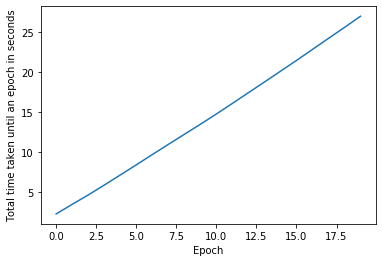

In [24]:
timetaken = timecallback()

sgd = SGD(lr=0.4, nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Train Model
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_split=0.2, callbacks = [timetaken])

In [25]:
import datetime
start = time.time()
score = model.evaluate(X_test, Y_test, verbose=0, callbacks = [timetaken])
end = time.time()
print(end-start)


0.3987560272216797


In [26]:

# Result
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.41884493827819824
Test accuracy: 0.8656666874885559


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


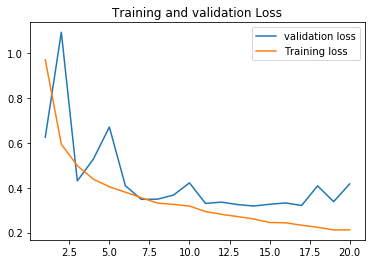

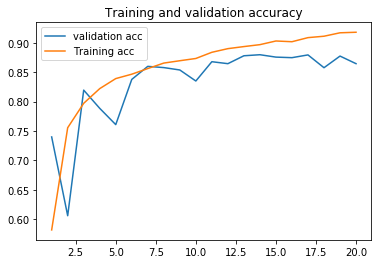

<Figure size 432x288 with 0 Axes>

In [27]:
print(history.history.keys())
acc = history.history['accuracy']
loss = history.history['loss']
validation_acc = history.history['val_accuracy']
validation_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot
plt.plot(epochs, validation_loss, label='validation loss')
plt.plot(epochs, loss, label='Training loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

plt.plot(epochs, validation_acc, label='validation acc')
plt.plot(epochs, acc, label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

In [28]:
# Import data
mnist_kaggle = np.load('fashion_mnist_test.npy', allow_pickle=True)

In [29]:
# Extract X and Y

X_kaggle =mnist_kaggle.item()['features']

X_kaggle = X_kaggle.reshape(-1, 28, 28,1).astype('float32')
if K.image_data_format() == 'channels_first':
    X_kaggle = X_kaggle.reshape(X_kaggle.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_kaggle = X_kaggle.reshape(X_kaggle.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [30]:
Y_kaggle = model.predict_classes(X_kaggle)
Y_kaggle_Dataframe = pd.DataFrame(Y_kaggle, columns = ['target'])
Y_kaggle_Dataframe['target'] += 1
Y_kaggle_Dataframe.to_csv("P2_Kaggle.csv", header=['target'], index=True)

